# Overview

This file is used to get an overall understanding of the main datasets.

Things to do and questions to address:
- What are the input variables in each dataset? For each, identify whether it is a categorical variable, non-categorical discrete numerical variable, continuous variable, etc.
- Summarize the dataset numerically.
- How does the dataset look like visually?
- How is each variable distributed? Do they follow a clear pattern? Is there any outlier?
- How complete is the dataset? Are there many missing values or "unevenness" in the variables?
- Is there any correlation between the variables (esp. with the target variable)? For time-series data, does each variable exhibit trend, seasonality and strong autocorrelation?
- What information or hypothesis can we intuitively infer from the data (before performing more advanced analysis)?
- How is the behaviour of the variables likely going to impact subsequent machine learning performance? Think about the important assumptions / conditions each model requires, then determine whether the behaviour exhibited by the current dataset is going to violate those assumptions.
- Before training a model, which variable do you think are likely going to contribute to the model's performance? How much?
- What variables / features can be engineered to improve performance, if at all?
- What computational difficulties are likely going to arise from this dataset?

# Imports

In [1]:
# Import third-party modules
import scipy.stats as ss
import numpy as np
import os
import pandas as pd
import random
import csv
import pylab
import matplotlib.pyplot as plt
from math import log
from IPython.display import display, HTML

# Import custom modules
from common.localio import *
from common.summary import *

# Datasets

Load each dataset and display the first few entries.

In [2]:
hist = CSVReader('../datasets/historical_transactions.csv')
merch = CSVReader('../datasets/merchants.csv')
new_merch = CSVReader('../datasets/new_merchant_transactions.csv')
# hist = CSVReader('../datasets/historical_transactions.csv', sample_size = 1000,  seed = 1)
# merch = CSVReader('../datasets/merchants.csv', sample_size = 1000,  seed = 1)
# new_merch = CSVReader('../datasets/new_merchant_transactions.csv', sample_size = 1000,  seed = 1)
train_set = CSVReader('../datasets/train.csv')
test_set = CSVReader('../datasets/test.csv')

**Historical Transactions**

This contains information about each card's transactions 
(up to 3 months).

- card_id: Card identifier
- month_lag: month lag to reference date
- purchase_date: Purchase date
- authorized_flag: Y' if approved, 'N' if denied
- category_3: anonymized category
- installments: number of installments of purchase
- category_1: anonymized category
- merchant_category_id: Merchant category identifier (anonymized)
- subsector_id: Merchant category group identifier (anonymized)
- merchant_id: Merchant identifier (anonymized)
- purchase_amount: Normalized purchase amount
- city_id: City identifier (anonymized)
- state_id: State identifier (anonymized)
- category_2: anonymized category

For joining purposes:
- card_id can join with *new_merchant_transactions*, *train* and *test*.
- merchant_id can join with *merchants*.

Sample size: 29112361
Column names and data types:


,Data Type
authorized_flag,object
card_id,object
city_id,int64
category_1,object
installments,int64
category_3,object
merchant_category_id,int64
merchant_id,object
month_lag,int64
purchase_amount,float64


First 5 rows:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


Numerical data summary: 



,installments,month_lag,purchase_amount
count,2.911236e+07,2.911236e+07,2.911236e+07
mean,6.484954e-01,-4.487294e+00,3.640090e-02
std,2.795577e+00,3.588800e+00,1.123522e+03
min,-1.000000e+00,-1.300000e+01,-7.469078e-01
25%,0.000000e+00,-7.000000e+00,-7.203559e-01
50%,0.000000e+00,-4.000000e+00,-6.883495e-01
75%,1.000000e+00,-2.000000e+00,-6.032543e-01
max,9.990000e+02,0.000000e+00,6.010604e+06


Plots 

installments: 



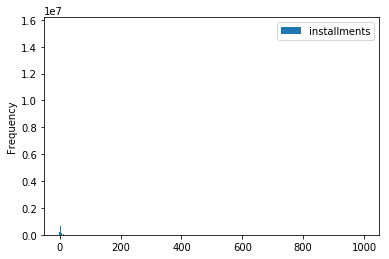

month_lag: 



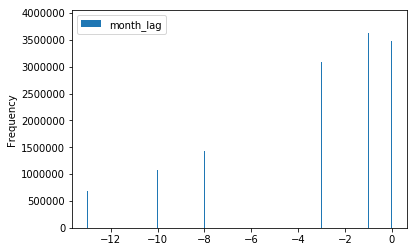

purchase_amount: 



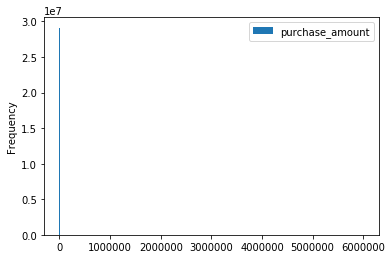

Categorical data summary:


,city_id,merchant_category_id,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,4.810130e+02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.493757e+02,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,3.070000e+02,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,4.540000e+02,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,7.050000e+02,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,8.910000e+02,5.000000e+00,2.400000e+01,4.100000e+01


-----
authorized_flag

Frequency table


,authorized_flag
Y,26595452
N,2516909


Number of unique categories: 2
Number of observations: 29112361
Number of missing observations: 0


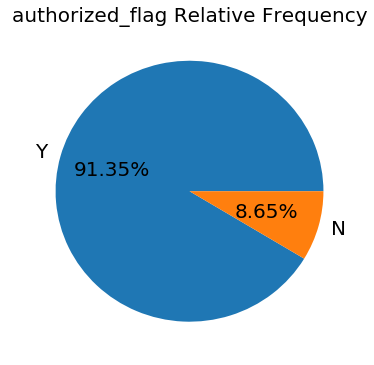

-----
city_id

Frequency table

Most frequent categories:


,city_id
69,4835441
-1,2478624
19,1151077
158,1113013
17,971714



Least frequent categories:


,city_id
319,1645
92,758
273,620
316,149
185,45


Number of unique categories: 308
Number of observations: 29112361
Number of missing observations: 0


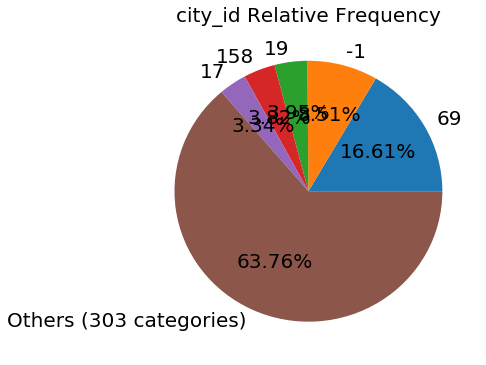

-----
category_1

Frequency table


,category_1
N,27028332
Y,2084029


Number of unique categories: 2
Number of observations: 29112361
Number of missing observations: 0


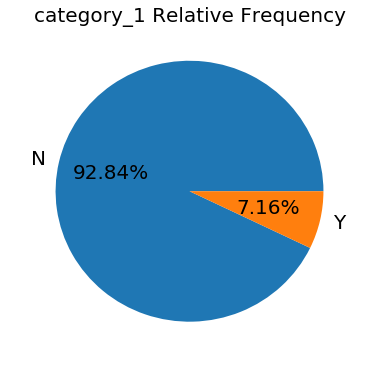

-----
category_3

Frequency table


,category_3
A,15411747
B,11677522
C,1844933


Number of unique categories: 3
Number of observations: 29112361
Number of missing observations: 178159


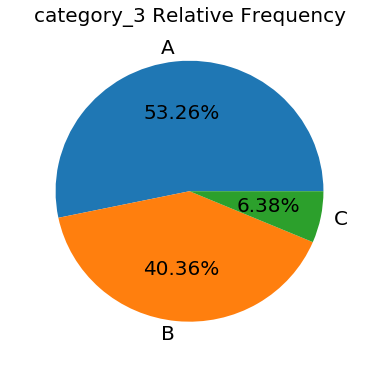

-----
merchant_category_id

Frequency table

Most frequent categories:


,merchant_category_id
705,5554009
307,3057930
278,2254227
80,1929413
367,1608239



Least frequent categories:


,merchant_category_id
311,1
322,1
882,1
86,1
687,1


Number of unique categories: 327
Number of observations: 29112361
Number of missing observations: 0


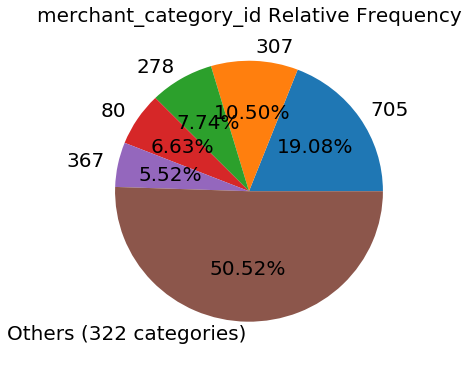

-----
category_2

Frequency table


,category_2
1.0,15177199
3.0,3911795
5.0,3725915
4.0,2618053
2.0,1026535


Number of unique categories: 5
Number of observations: 29112361
Number of missing observations: 2652864


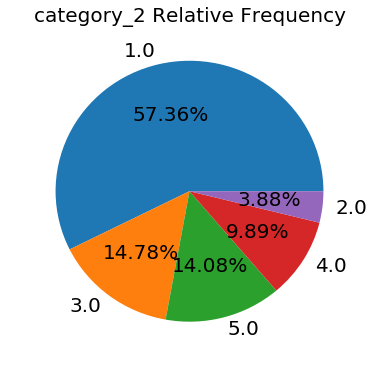

-----
state_id

Frequency table

Most frequent categories:


,state_id
9,10568881
-1,2652864
16,2143420
15,2079255
5,1655124



Least frequent categories:


,state_id
24,205952
14,171513
8,157829
17,116139
6,7233


Number of unique categories: 25
Number of observations: 29112361
Number of missing observations: 0


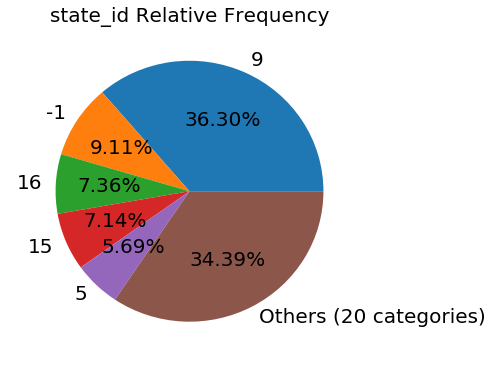

-----
subsector_id

Frequency table

Most frequent categories:


,subsector_id
33,5594146
37,4531755
19,3147440
29,2813095
34,2759431



Least frequent categories:


,subsector_id
24,18134
40,13424
-1,2252
11,2009
28,124


Number of unique categories: 41
Number of observations: 29112361
Number of missing observations: 0


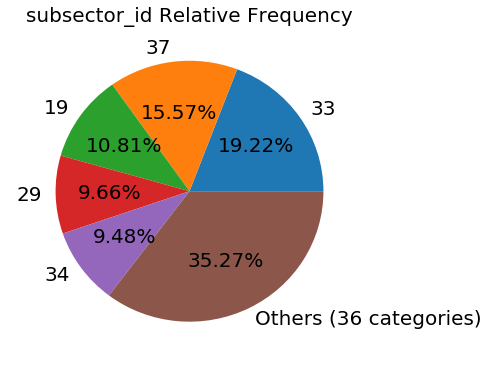

-----
Number of entries missing values: 2969504 



In [3]:
show_basic_info(hist.data, 
                numerical_cols = ['installments', 'month_lag', 'purchase_amount'],
                categorical_cols = ['authorized_flag', 'city_id', 'category_1', 'category_3', 
                                    'merchant_category_id', 'category_2', 'state_id', 'subsector_id']
               )

**Merchants**

This contains detailed information about each merchant.

- merchant_id: Unique merchant identifier
- merchant_group_id: Merchant group (anonymized )
- merchant_category_id: Unique identifier for merchant category (anonymized )
- subsector_id: Merchant category group (anonymized )
- numerical_1: anonymized measure
- numerical_2: anonymized measure
- category_1: anonymized category
- most_recent_sales_range: Range of revenue (monetary units) in last active month --> A > B > C > D > E
- most_recent_purchases_range: Range of quantity of transactions in last active month --> A > B > C > D > E
- avg_sales_lag3: Monthly average of revenue in last 3 months divided by revenue in last active month
- avg_purchases_lag3: Monthly average of transactions in last 3 months divided by transactions in last active month
- active_months_lag3: Quantity of active months within last 3 months
- avg_sales_lag6: Monthly average of revenue in last 6 months divided by revenue in last active month
- avg_purchases_lag6: Monthly average of transactions in last 6 months divided by transactions in last active month
- active_months_lag6: Quantity of active months within last 6 months
- avg_sales_lag12: Monthly average of revenue in last 12 months divided by revenue in last active month
- avg_purchases_lag12: Monthly average of transactions in last 12 months divided by transactions in last active month
- active_months_lag12: Quantity of active months within last 12 months
- category_4: anonymized category
- city_id: City identifier (anonymized )
- state_id: State identifier (anonymized )
- category_2: anonymized category

For joining purposes:
- merchant_id can join with *historical_transactions*.

Sample size: 334696
Column names and data types:


,Data Type
merchant_id,object
merchant_group_id,int64
merchant_category_id,int64
subsector_id,int64
numerical_1,float64
numerical_2,float64
category_1,object
most_recent_sales_range,object
most_recent_purchases_range,object
avg_sales_lag3,float64


First 5 rows:


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


Numerical data summary: 



,numerical_1,numerical_2,avg_sales_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000
mean,0.011476,0.008103,13.832993,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335
std,1.098154,1.070497,2395.489999,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138
min,-0.057471,-0.057471,-82.130000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000
25%,-0.057471,-0.057471,0.880000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000
50%,-0.057471,-0.057471,1.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000
75%,-0.047556,-0.047556,1.160000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000
max,183.735111,182.079322,851844.640000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000


Plots 

numerical_1: 



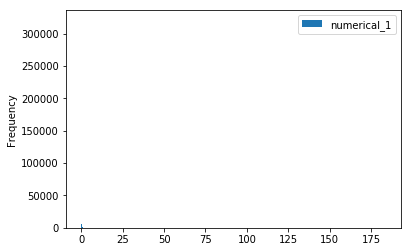

numerical_2: 



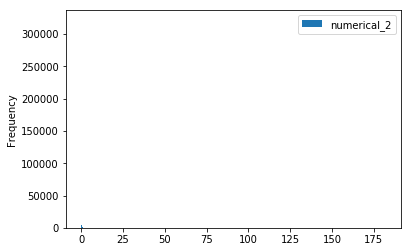

avg_sales_lag3: 



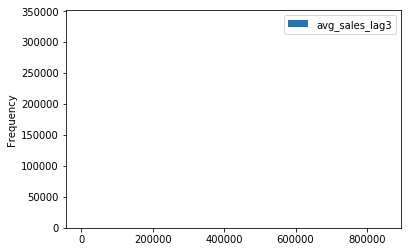

avg_sales_lag6: 



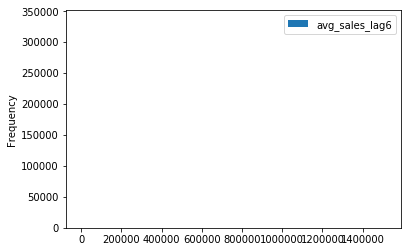

avg_purchases_lag6: 



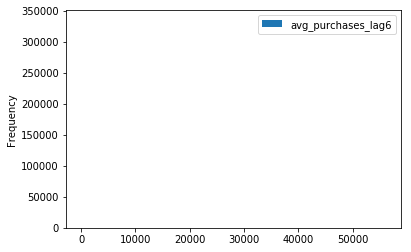

active_months_lag6: 



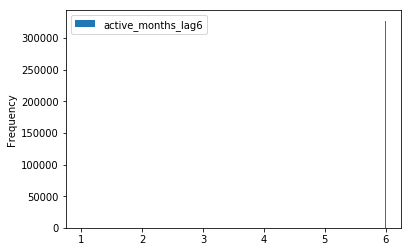

avg_sales_lag12: 



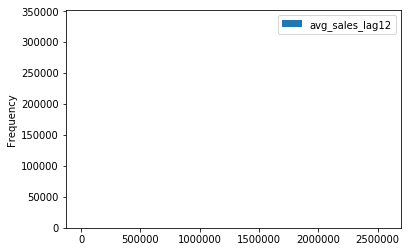

avg_purchases_lag12: 



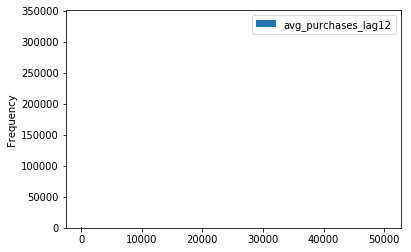

active_months_lag12: 



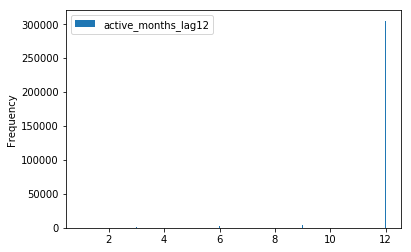

Categorical data summary:


,merchant_group_id,merchant_category_id,subsector_id,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,347.000000,24.000000,5.000000


-----
merchant_group_id

Frequency table

Most frequent categories:


,merchant_group_id
35,46026
434,482
419,365
713,333
3648,305



Least frequent categories:


,merchant_group_id
36255,1
95648,1
97697,1
91554,1
26487,1


Number of unique categories: 109391
Number of observations: 334696
Number of missing observations: 0


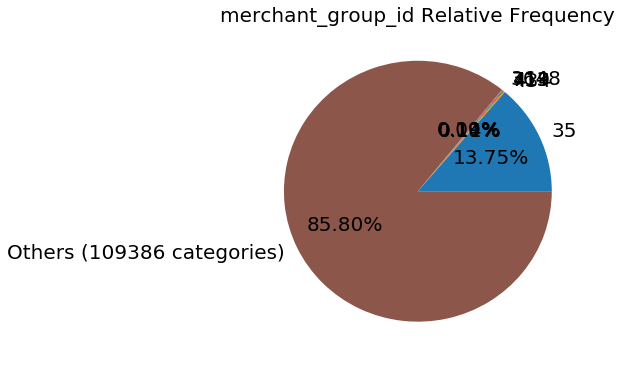

-----
merchant_category_id

Frequency table

Most frequent categories:


,merchant_category_id
705,30666
278,17992
307,17528
367,15387
68,14341



Least frequent categories:


,merchant_category_id
805,1
153,1
281,1
789,1
322,1


Number of unique categories: 324
Number of observations: 334696
Number of missing observations: 0


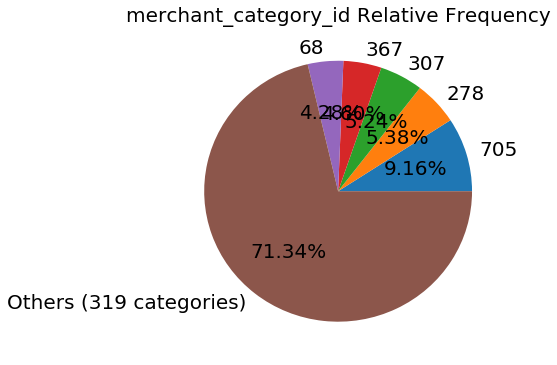

-----
subsector_id

Frequency table

Most frequent categories:


,subsector_id
27,51678
37,35575
33,30887
34,26533
21,24207



Least frequent categories:


,subsector_id
3,342
24,242
11,21
28,1
-1,1


Number of unique categories: 41
Number of observations: 334696
Number of missing observations: 0


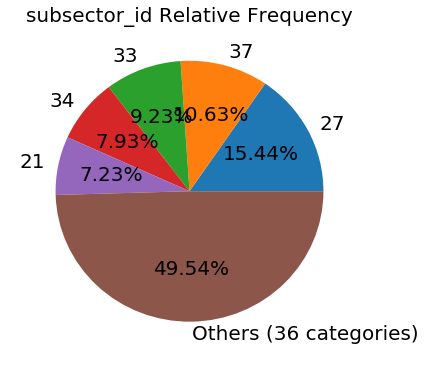

-----
category_1

Frequency table


,category_1
N,327657
Y,7039


Number of unique categories: 2
Number of observations: 334696
Number of missing observations: 0


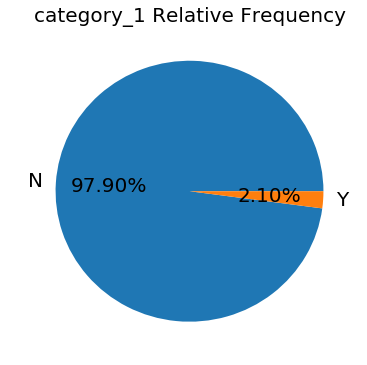

-----
most_recent_sales_range

Frequency table


,most_recent_sales_range
E,177104
D,117475
C,34075
B,5037
A,1005


Number of unique categories: 5
Number of observations: 334696
Number of missing observations: 0


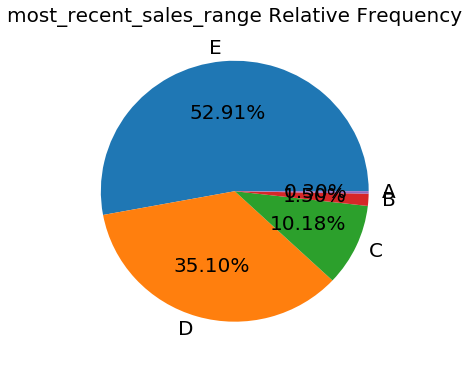

-----
most_recent_purchases_range

Frequency table


,most_recent_purchases_range
E,175309
D,119187
C,34144
B,5046
A,1010


Number of unique categories: 5
Number of observations: 334696
Number of missing observations: 0


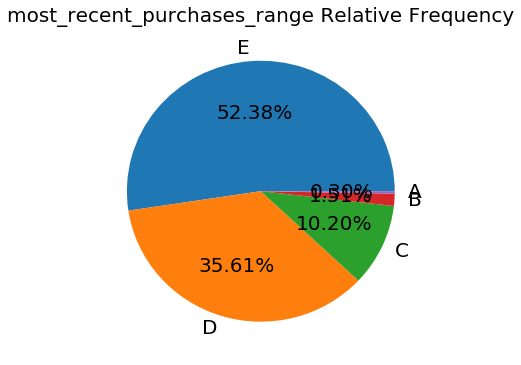

-----
category_4

Frequency table


,category_4
N,238596
Y,96100


Number of unique categories: 2
Number of observations: 334696
Number of missing observations: 0


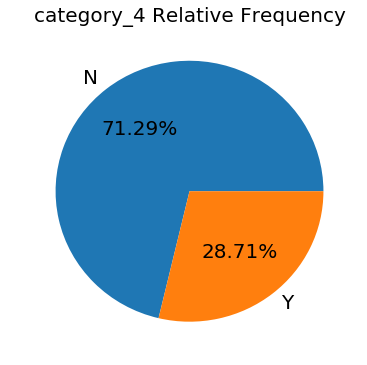

-----
city_id

Frequency table

Most frequent categories:


,city_id
-1,105184
69,21658
158,7957
17,6518
143,5368



Least frequent categories:


,city_id
215,138
263,120
92,55
286,11
320,11


Number of unique categories: 271
Number of observations: 334696
Number of missing observations: 0


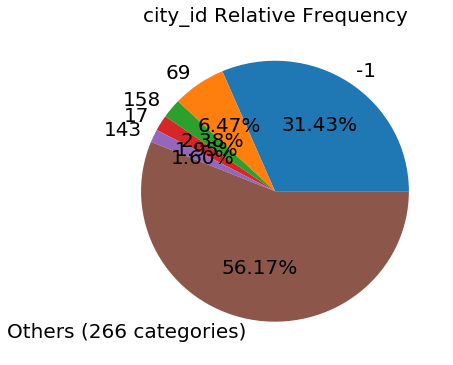

-----
state_id

Frequency table

Most frequent categories:


,state_id
9,92708
16,33226
15,27224
5,23547
19,18793



Least frequent categories:


,state_id
10,3184
1,2908
8,2842
17,1961
6,1260


Number of unique categories: 25
Number of observations: 334696
Number of missing observations: 0


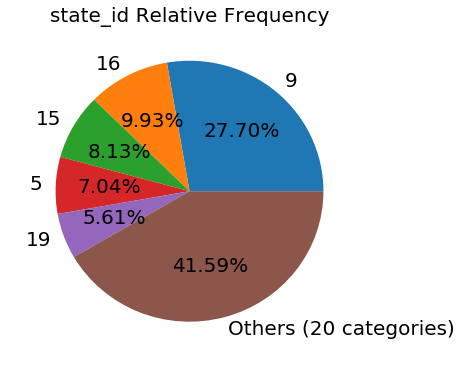

-----
category_2

Frequency table


,category_2
1.0,160888
5.0,52923
3.0,51887
4.0,36450
2.0,20661


Number of unique categories: 5
Number of observations: 334696
Number of missing observations: 11887


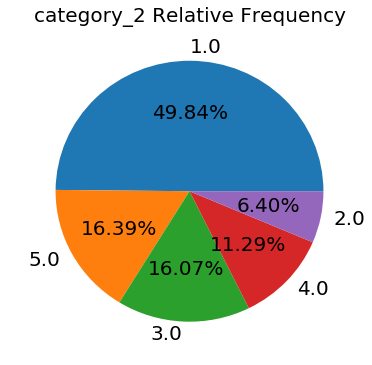

-----
Number of entries missing values: 11926 



In [4]:
show_basic_info(merch.data, 
                numerical_cols = ['numerical_1', 'numerical_2', 'avg_sales_lag3', 'avg_sales_lag6', 
                                  'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12',
                                  'avg_purchases_lag12', 'active_months_lag12'],
                categorical_cols = ['merchant_group_id', 'merchant_category_id', 'subsector_id',
                                   'category_1', 'most_recent_sales_range', 'most_recent_purchases_range',
                                   'category_4', 'city_id', 'state_id', 'category_2']
               )

In [5]:
merch.data[['avg_purchases_lag6']][~np.isinf(merch.data['avg_purchases_lag6']) & ~np.isnan(merch.data['avg_purchases_lag6'])].describe()

,avg_purchases_lag6
count,334693.000000
mean,1.887568
std,97.862790
min,0.167045
25%,0.902245
50%,1.026961
75%,1.215556
max,56077.500000


**New Merchant Transactions**

This contains transactins at merchants not yet visited over a period of 2 months.

Sample size: 1963031
Column names and data types:


,Data Type
authorized_flag,object
card_id,object
city_id,int64
category_1,object
installments,int64
category_3,object
merchant_category_id,int64
merchant_id,object
month_lag,int64
purchase_amount,float64


First 5 rows:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


Numerical data summary: 



,installments,month_lag,purchase_amount
count,1.963031e+06,1.963031e+06,1.963031e+06
mean,6.829643e-01,1.476515e+00,-5.509690e-01
std,1.584069e+00,4.994483e-01,6.940043e-01
min,-1.000000e+00,1.000000e+00,-7.468928e-01
25%,0.000000e+00,1.000000e+00,-7.166294e-01
50%,1.000000e+00,1.000000e+00,-6.748406e-01
75%,1.000000e+00,2.000000e+00,-5.816162e-01
max,9.990000e+02,2.000000e+00,2.631575e+02


Plots 

installments: 



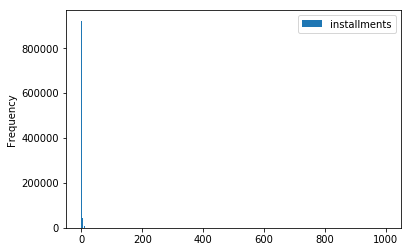

month_lag: 



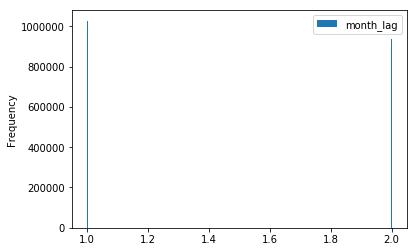

purchase_amount: 



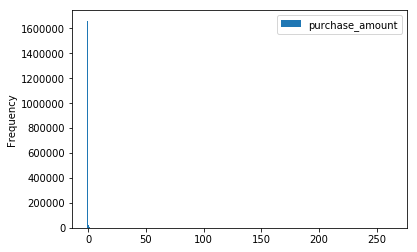

Categorical data summary:


,merchant_category_id,category_2,state_id,subsector_id
count,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,4.309701e+02,2.197841e+00,1.088067e+01,2.597624e+01
std,2.463385e+02,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.780000e+02,1.000000e+00,9.000000e+00,1.900000e+01
50%,3.670000e+02,1.000000e+00,9.000000e+00,2.900000e+01
75%,6.830000e+02,3.000000e+00,1.500000e+01,3.400000e+01
max,8.910000e+02,5.000000e+00,2.400000e+01,4.100000e+01


-----
authorized_flag

Frequency table


,authorized_flag
Y,1963031


Number of unique categories: 1
Number of observations: 1963031
Number of missing observations: 0


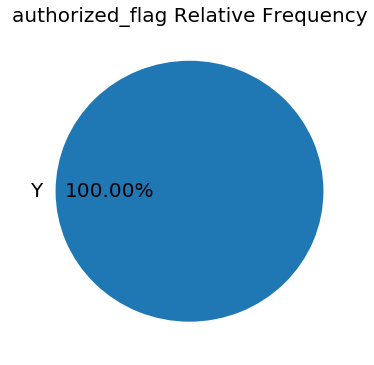

-----
category_1

Frequency table


,category_1
N,1899935
Y,63096


Number of unique categories: 2
Number of observations: 1963031
Number of missing observations: 0


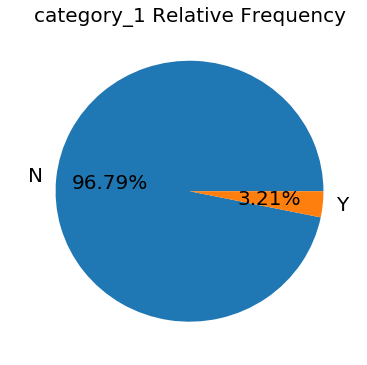

-----
category_3

Frequency table


,category_3
A,922244
B,836178
C,148687


Number of unique categories: 3
Number of observations: 1963031
Number of missing observations: 55922


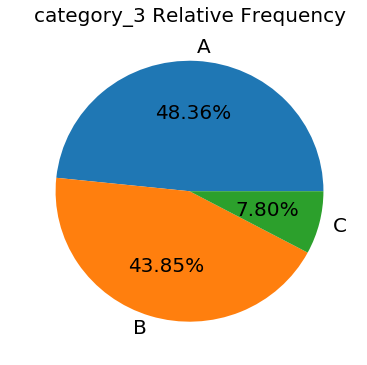

-----
merchant_category_id

Frequency table

Most frequent categories:


,merchant_category_id
307,191631
705,168852
278,168140
80,144667
367,116406



Least frequent categories:


,merchant_category_id
49,1
281,1
11,1
192,1
109,1


Number of unique categories: 314
Number of observations: 1963031
Number of missing observations: 0


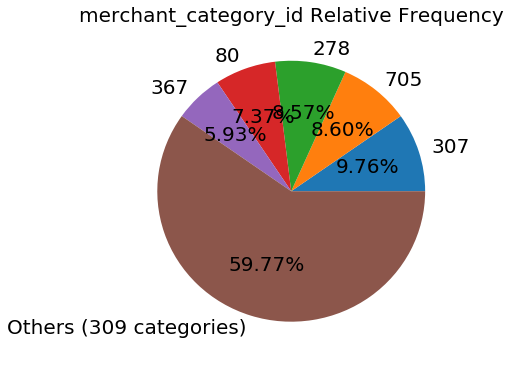

-----
category_2

Frequency table


,category_2
1.0,1058242
3.0,289525
5.0,259266
4.0,178590
2.0,65663


Number of unique categories: 5
Number of observations: 1963031
Number of missing observations: 111745


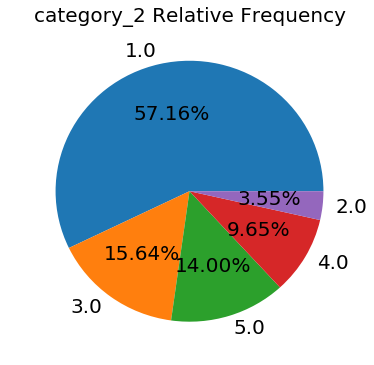

-----
state_id

Frequency table

Most frequent categories:


,state_id
9,733146
15,158304
16,139765
5,120158
-1,111745



Least frequent categories:


,state_id
24,12825
8,12218
14,10326
17,8450
6,357


Number of unique categories: 25
Number of observations: 1963031
Number of missing observations: 0


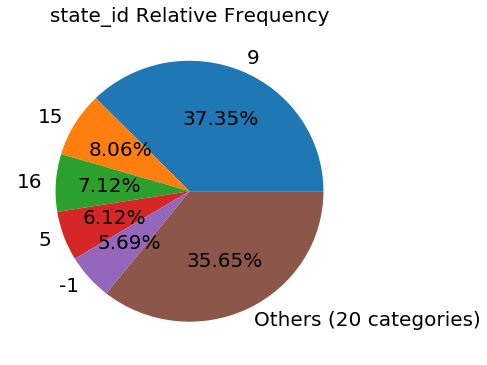

-----
subsector_id

Frequency table

Most frequent categories:


,subsector_id
37,340053
19,200528
27,194977
34,183700
33,172585



Least frequent categories:


,subsector_id
5,1316
40,953
11,560
-1,20
28,8


Number of unique categories: 41
Number of observations: 1963031
Number of missing observations: 0


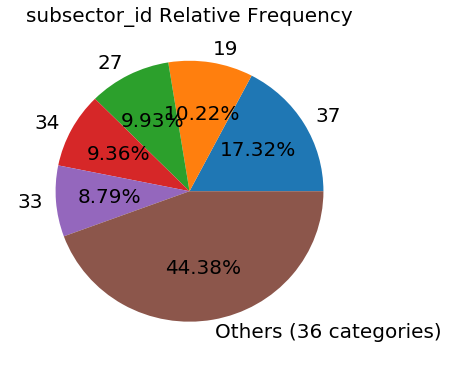

-----
Number of entries missing values: 193883 



In [6]:
show_basic_info(new_merch.data, 
                numerical_cols = ['installments', 'month_lag', 'purchase_amount',],
                categorical_cols = ['authorized_flag', 'category_1', 'category_3', 'merchant_category_id', 
                                   'category_2', 'state_id', 'subsector_id']
               )

**Training Set**

This set contains the target variable and the essential information about each credit card.

For joining purposes:
- card_id can join with *historical_transactions*, *new_merchant_transactions* and *test*.

Sample size: 201917
Column names and data types:


,Data Type
first_active_month,object
card_id,object
feature_1,int64
feature_2,int64
feature_3,int64
target,float64


First 5 rows:


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


Numerical data summary: 



,target
count,201917.000000
mean,-0.393636
std,3.850500
min,-33.219281
25%,-0.883110
50%,-0.023437
75%,0.765453
max,17.965068


Plots 

target: 



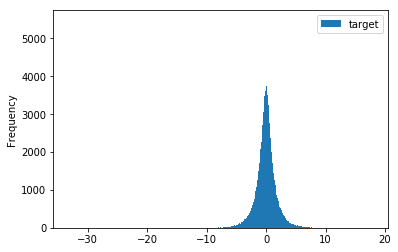

Categorical data summary:


,feature_1,feature_2,feature_3
count,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569
std,1.186160,0.751362,0.495683
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,2.000000,1.000000
max,5.000000,3.000000,1.000000


-----
feature_1

Frequency table


,feature_1
3,73573
2,55797
5,40625
4,19885
1,12037


Number of unique categories: 5
Number of observations: 201917
Number of missing observations: 0


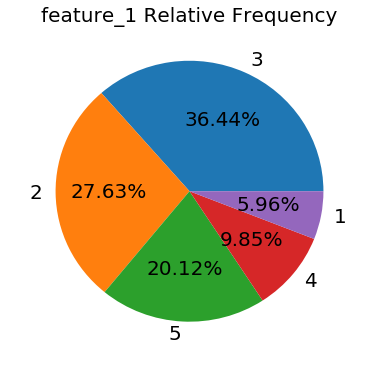

-----
feature_2

Frequency table


,feature_2
1,89242
2,74839
3,37836


Number of unique categories: 3
Number of observations: 201917
Number of missing observations: 0


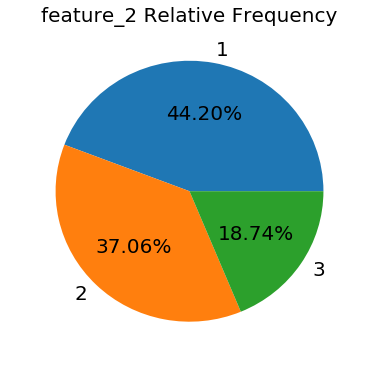

-----
feature_3

Frequency table


,feature_3
1,114198
0,87719


Number of unique categories: 2
Number of observations: 201917
Number of missing observations: 0


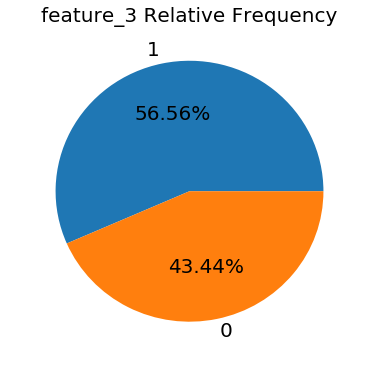

-----
Number of entries missing values: 0 



In [7]:
show_basic_info(train_set.data, 
                numerical_cols = ['target'],
                categorical_cols = ['feature_1', 'feature_2', 'feature_3']
               )

**Test Set**

This set contains data for testing model performance.

For joining purposes:
- card_id can join with *historical_transactions*, *new_merchant_transactions* and *train*.

Sample size: 201917
Column names and data types:


,Data Type
first_active_month,object
card_id,object
feature_1,int64
feature_2,int64
feature_3,int64
target,float64


First 5 rows:


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


Numerical data summary: 

No numerical column to display.

Plots 

Categorical data summary:


,feature_1,feature_2,feature_3
count,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569
std,1.186160,0.751362,0.495683
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,2.000000,1.000000
max,5.000000,3.000000,1.000000


-----
feature_1

Frequency table


,feature_1
3,73573
2,55797
5,40625
4,19885
1,12037


Number of unique categories: 5
Number of observations: 201917
Number of missing observations: 0


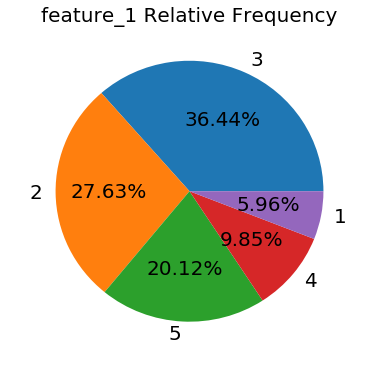

-----
feature_2

Frequency table


,feature_2
1,89242
2,74839
3,37836


Number of unique categories: 3
Number of observations: 201917
Number of missing observations: 0


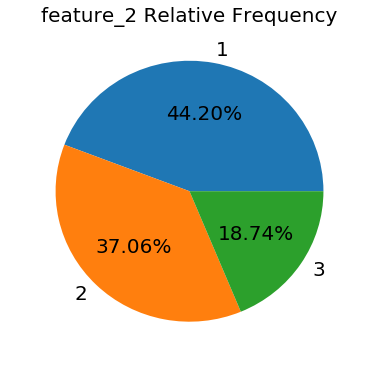

-----
feature_3

Frequency table


,feature_3
1,114198
0,87719


Number of unique categories: 2
Number of observations: 201917
Number of missing observations: 0


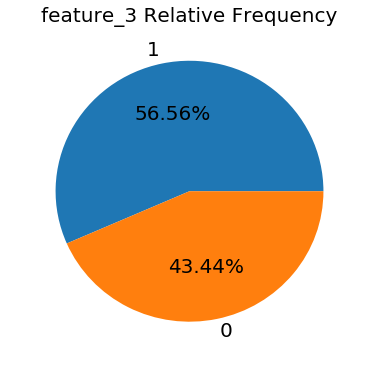

-----
Number of entries missing values: 0 



In [8]:
show_basic_info(train_set.data, 
                numerical_cols = [],
                categorical_cols = ['feature_1', 'feature_2', 'feature_3']
               )

# Further Explorations

**Training Set**

Plot the target values:

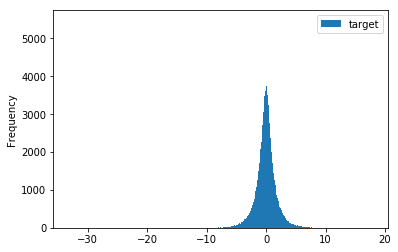

In [9]:
train_set.data[['target']].plot.hist(bins = 1000)
plt.show()

The target seems to have outliers below the -10 level. Examine in further detail:

In [10]:
print(f'Number of target points below -10: {sum([1 for each in train_set.data["target"] if each < -10])}')
print(f'Percentage out of total sample size: {round(sum([1 for each in train_set.data["target"] if each < -10]) / train_set.n,2)}%')

Number of target points below -10: 2264
Percentage out of total sample size: 0.01%


Plot the target values by distinct regions to get a clearer picture.

Target values no less than -30:


,target
count,199710.000000
mean,-0.030879
std,1.717793
min,-17.608147
25%,-0.844513
50%,-0.007783
75%,0.777331
max,17.965068


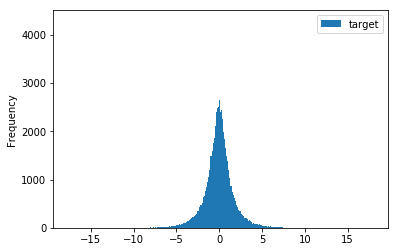

In [11]:
train_set_no_less_than_neg30 = train_set.data[['target']][(train_set.data['target'] >= -30)]
print("Target values no less than -30:")
display(train_set_no_less_than_neg30.describe())
train_set_no_less_than_neg30.plot.hist(bins = 1000)
plt.show()

Target values less than -30:


,target
count,2.207000e+03
mean,-3.321928e+01
std,1.193982e-12
min,-3.321928e+01
25%,-3.321928e+01
50%,-3.321928e+01
75%,-3.321928e+01
max,-3.321928e+01


This region has only a single value: True


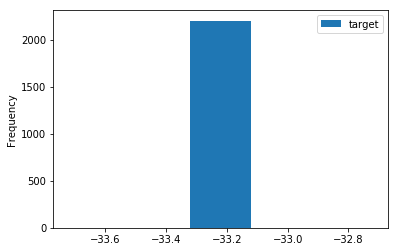

In [12]:
train_set_less_than_neg30 = train_set.data[['target']][(train_set.data['target'] < -30)]
print("Target values less than -30:")
display(train_set_less_than_neg30.describe())

print(f'This region has only a single value: {min(train_set_less_than_neg30) == max(train_set_less_than_neg30)}')

train_set_less_than_neg30.plot.hist(bins = 5)
plt.show()

The number of outliers at below -30 and how concentrated these points are are highly unlikely to come from any standard normal distribution.

Normality tests suggests that the target isn't normally distributed either:

QQ Plot


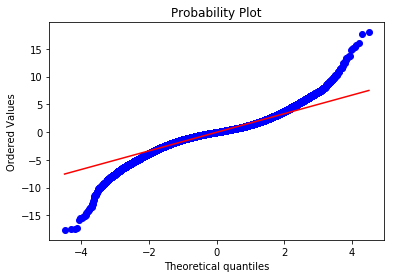

Shapiro-Wilk test statistic: 0.9491176605224609
p-value: 0.0


C:\Users\Will\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
print('QQ Plot')
ss.probplot(train_set_no_less_than_neg30.target, dist="norm", plot = pylab)
pylab.show()

# Perform the Shapiro-Wilk test.
# Note that, with large sample sizes, even small departures from the
# normal distribution will lead to the rejection of the null hypothesis,
# hence leading to the conclusion that the underlying distribution is
# not normal (even though it may actually be).
sw_stat, sw_p = ss.shapiro(train_set_no_less_than_neg30)
print(f'Shapiro-Wilk test statistic: {sw_stat}')
print(f'p-value: {sw_p}')

**Overall Remarks**

- The distribution of many of the numerical observations appear to be concentrated aruond a local neighbourhood while the rest scatter out to a wide range.
- The target value is unlikely to be normally distributed and is prone to having outliers.